# Chapter 2: Univariate Data Summary

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

This notebook provides an interactive introduction to univariate data analysis using Python. You'll learn how to summarize and visualize single-variable datasets using summary statistics and various chart types.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmg777/aed/blob/main/notebooks_colab/ch02_Univariate_Data_Summary.ipynb)

## Chapter Overview

**Univariate data** consists of observations on a single variable—for example, annual earnings, individual income, or GDP over time. This chapter teaches you how to summarize and visualize such data effectively.

**What you'll learn:**
- Calculate summary statistics (mean, median, standard deviation, quartiles, skewness, kurtosis)
- Create visualizations for numerical data (box plots, histograms, kernel density estimates, line charts)
- Visualize categorical data (bar charts, pie charts)
- Apply data transformations (logarithms, standardization)
- Work with time series transformations (moving averages, seasonal adjustment)

**Datasets used:**
- **AED_EARNINGS.DTA**: Annual earnings for 171 full-time working women aged 30 in 2010
- **AED_REALGDPPC.DTA**: U.S. quarterly real GDP per capita from 1959 to 2020
- **AED_HEALTHCATEGORIES.DTA**: U.S. health expenditures by category in 2018
- **AED_FISHING.DTA**: Fishing site choices for 1,182 fishers
- **AED_MONTHLYHOMESALES.DTA**: Monthly U.S. home sales from 1999 to 2015

**Chapter outline:**
1. Summary Statistics for Numerical Data
2. Charts for Numerical Data
3. Charts for Numerical Data by Category
4. Summary and Charts for Categorical Data
5. Data Transformation
6. Data Transformation for Time Series Data

## Slides

In [1]:
from IPython.display import HTML, display

display(HTML("""
<div style="position: relative; width: 100%; height: 0; padding-top: 55.8342%;
 padding-bottom: 0; box-shadow: 0 2px 8px 0 rgba(63,69,81,0.16);
 margin-top: 1.6em; margin-bottom: 0.9em; overflow: hidden;
 border-radius: 8px; will-change: transform;">
  <iframe loading="lazy"
    style="position: absolute; width: 100%; height: 100%;
    top: 0; left: 0; border: none; padding: 0; margin: 0;"
    src="https://www.canva.com/design/DAG_Cb9ChxI/Ghe9aWGgbiFGJIBc88_4aQ/view?embed"
    allowfullscreen>
  </iframe>
</div>
<a href="https://www.canva.com/design/DAG_Cb9ChxI/Ghe9aWGgbiFGJIBc88_4aQ/view"
   target="_blank" rel="noopener">
   s02 Univariate Data Summary
</a> 
"""))


## Podcast

<audio controls>
  <source src="https://files.catbox.moe/dvy4xr.m4a" type="audio/mp4">
  Your browser does not support the audio element.
</audio>


## 🔧 Setup

Run this cell first to import all required packages and configure the environment.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 2.1 Summary Statistics for Numerical Data

**Summary statistics** provide a concise numerical description of a dataset. For a sample of size $n$, observations are denoted:

$$x_1, x_2, \ldots, x_n$$

**Key summary statistics:**

1. **Mean (average)**: 
   $$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

2. **Median**: The middle value when data are ordered

3. **Standard deviation**: Measures the spread of data around the mean
   $$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

4. **Quartiles**: Values that divide ordered data into fourths (25th, 50th, 75th percentiles)

5. **Skewness**: Measures asymmetry of the distribution (positive = right-skewed)

6. **Kurtosis**: Measures heaviness of distribution tails (higher = fatter tails)

**Economic Example:** We'll examine annual earnings for full-time working women aged 30 in 2010.

## 📊 Load Earnings Data

In [2]:
# Load the earnings dataset from GitHub
data_earnings = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGS.DTA')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {data_earnings.shape[0]} observations, {data_earnings.shape[1]} variables")
print("\nFirst 5 observations:")
print(data_earnings.head())

✓ Data loaded successfully!
  Shape: 171 observations, 4 variables

First 5 observations:
   earnings  education  age  gender
0     25000         14   30     0.0
1     40000         12   30     0.0
2     25000         13   30     0.0
3     38000         13   30     0.0
4     28800         12   30     0.0


## 📈 Calculate Summary Statistics

In [3]:
# Basic summary statistics
print("=" * 70)
print("BASIC DESCRIPTIVE STATISTICS")
print("=" * 70)
print(data_earnings.describe())

# Detailed statistics for earnings
earnings = data_earnings['earnings']

stats_dict = {
    'Count': len(earnings),
    'Mean': earnings.mean(),
    'Std Dev': earnings.std(),
    'Min': earnings.min(),
    '25th percentile': earnings.quantile(0.25),
    'Median': earnings.median(),
    '75th percentile': earnings.quantile(0.75),
    'Max': earnings.max(),
    'Skewness': stats.skew(earnings),
    'Kurtosis': stats.kurtosis(earnings)
}

print("\n" + "=" * 70)
print("Table 2.1: DETAILED STATISTICS FOR EARNINGS")
print("=" * 70)
for key, value in stats_dict.items():
    if key in ['Count']:
        print(f"{key:20s}: {value:,.0f}")
    elif key in ['Skewness', 'Kurtosis']:
        print(f"{key:20s}: {value:.2f}")
    else:
        print(f"{key:20s}: ${value:,.2f}")

BASIC DESCRIPTIVE STATISTICS
            earnings   education    age  gender
count     171.000000  171.000000  171.0   171.0
mean    41412.690058   14.432749   30.0     0.0
std     25527.053396    2.735364    0.0     0.0
min      1050.000000    3.000000   30.0     0.0
25%     25000.000000   12.000000   30.0     0.0
50%     36000.000000   14.000000   30.0     0.0
75%     49000.000000   16.000000   30.0     0.0
max    172000.000000   20.000000   30.0     0.0

Table 2.1: DETAILED STATISTICS FOR EARNINGS
Count               : 171
Mean                : $41,412.69
Std Dev             : $25,527.05
Min                 : $1,050.00
25th percentile     : $25,000.00
Median              : $36,000.00
75th percentile     : $49,000.00
Max                 : $172,000.00
Skewness            : 1.71
Kurtosis            : 4.32


## Interpreting Summary Statistics for Earnings

**Key findings from the 171 full-time working women aged 30:**

**1. Central Tendency - Mean vs Median:**
- **Mean = $41,412.69**: The arithmetic average
- **Median = $36,000**: The middle value
- **Gap = $5,412** (mean is 15% higher than median)
- **Why?** This signals right skewness—some high earners pull the mean upward

**2. Spread - Standard Deviation:**
- **Std Dev = $25,527.05**
- This equals 61.6% of the mean (substantial variation)
- **Rule of thumb:** About 68% of women earn within $41,413 ± $25,527 = $15,886 to $66,940

**3. Range and Quartiles:**
- **Minimum = $1,050** (possibly part-time misclassified, or very low earner)
- **25th percentile = $25,000** (bottom quarter earns ≤$25k)
- **75th percentile = $49,000** (top quarter earns ≥$49k)
- **Maximum = $172,000** (highest earner makes 164× more than lowest!)
- **Interquartile range (IQR) = $24,000** (middle 50% span $24k)

**4. Shape Measures:**
- **Skewness = 1.71** (strongly positive)
  - Values > 1 indicate strong right skew
  - Long right tail with high earners
  - Distribution is NOT symmetric
- **Kurtosis = 4.32** (excess kurtosis, compared to normal = 0)
  - Heavier tails than normal distribution
  - More extreme values than a bell curve would predict
  - Greater chance of outliers

**Economic interpretation:**
Earnings distributions are typically right-skewed because:
- **Lower bound exists**: Can't earn less than zero (or minimum wage)
- **No upper bound**: Some professionals earn very high incomes
- **Labor market structure**: Most workers cluster around median, but executives, specialists, and entrepreneurs create a long right tail

**Practical implication:** The median ($36,000) is a better measure of "typical" earnings than the mean ($41,413) because it's not inflated by high earners.

## 📦 Figure 2.2: Box Plot

A **box plot** (or box-and-whisker plot) visualizes key summary statistics:
- **Box**: Extends from the 25th to 75th percentile (interquartile range)
- **Red line**: Median (50th percentile)
- **Whiskers**: Extend to minimum and maximum values (or 1.5 × IQR from quartiles)
- **Dots**: Outliers beyond the whiskers

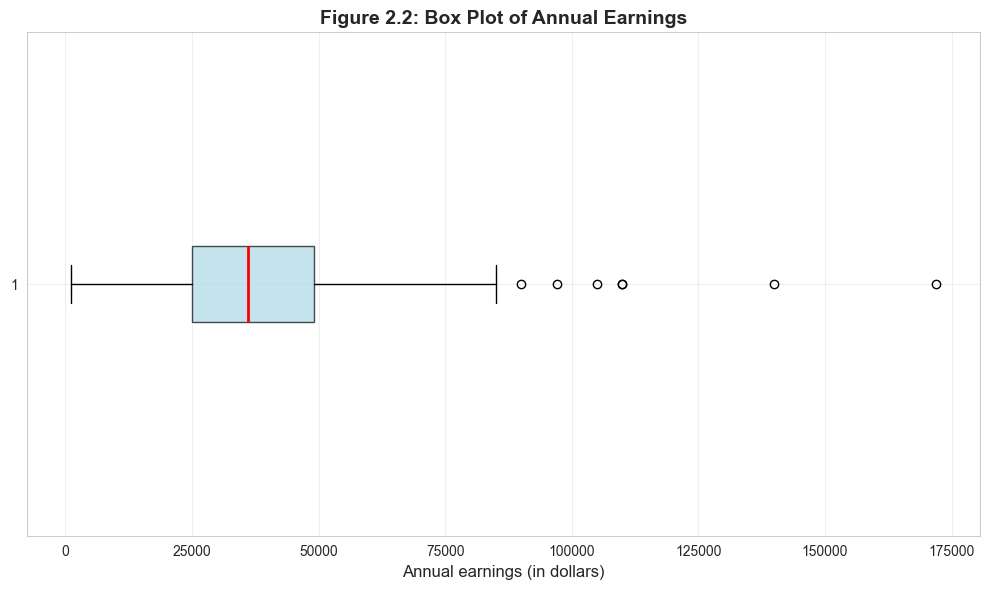


📊 The box plot shows:
   - Most earnings are between $25,000 and $50,000 (the box)
   - The median ($36,000) is closer to the lower quartile
   - Several high-earning outliers on the right


In [4]:
# Create box plot of earnings
fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot(earnings, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
ax.set_xlabel('Annual earnings (in dollars)', fontsize=12)
ax.set_title('Figure 2.2: Box Plot of Annual Earnings', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The box plot shows:")
print("   - Most earnings are between $25,000 and $50,000 (the box)")
print("   - The median ($36,000) is closer to the lower quartile")
print("   - Several high-earning outliers on the right")

## Interpreting the Box Plot

**What the box plot reveals:**

**1. The Box (Interquartile Range):**
- Extends from $25,000 (Q1) to $49,000 (Q3)
- Contains the middle 50% of earners
- Width of $24,000 shows moderate spread in the middle

**2. The Red Line (Median):**
- Located at $36,000
- Positioned closer to the LOWER edge of the box
- This leftward position confirms right skewness

**3. The Whiskers:**
- Lower whisker extends to $1,050 (minimum)
- Upper whisker extends to outliers
- Right whisker is MUCH longer than left whisker (asymmetry)

**4. The Outliers (dots on right):**
- Several points beyond the upper whisker
- Represent high earners (likely $100k+)
- Maximum at $172,000 is an extreme outlier

**Visual insights:**
- **NOT symmetric**: If symmetric, median would be in center of box
- **Right tail dominates**: Upper whisker + outliers extend much farther than lower whisker
- **Concentration**: Most data packed in the $25k-$49k range
- **Rare extremes**: A few very high earners create the long right tail

**Comparison to summary statistics:**
- Box plot VISUALLY confirms what skewness (1.71) told us numerically
- Quartiles ($25k, $36k, $49k) match the box structure
- Outliers explain why kurtosis (4.32) is high—heavy tails

**Economic story:** The typical woman in this sample earns $25k-$49k, but a small group of high earners (doctors, lawyers, executives?) creates substantial inequality within this age-30 cohort.

## 2.2 Charts for Numerical Data

Beyond summary statistics, **visualizations** reveal patterns in data that numbers alone might miss.

**Common charts for numerical data:**
1. **Histogram**: Shows the frequency distribution by grouping data into bins
2. **Kernel density estimate**: A smoothed histogram that estimates the underlying continuous distribution
3. **Line chart**: For ordered data (especially time series)

**Bin width matters:** Wider bins give a coarse overview; narrower bins show more detail but can be noisy.

## 📊 Figure 2.4: Histograms with Different Bin Widths

## Interpreting Histograms with Different Bin Widths

**Panel A: Wider bins ($15,000):**
- **Reveals overall shape**: Right-skewed distribution with long right tail
- **Peak location**: Highest bar is in the $15k-$30k range
- **Pattern**: Frequencies decline as earnings increase
- **Advantages**: Simple, clear overall pattern, less "noisy"
- **Disadvantages**: Hides fine details, obscures multiple modes

**Panel B: Narrower bins ($7,500):**
- **Reveals more detail**: Multiple peaks visible within the distribution
- **Peak location**: Clearer concentration around $22.5k-$30k
- **Secondary peaks**: Visible around $37.5k-$45k (possible clustering at round numbers?)
- **Advantages**: Shows fine structure, reveals potential clustering
- **Disadvantages**: More "jagged," can look noisy

**Key observations across both panels:**

1. **Right skewness confirmed**: Both histograms show long right tail extending to $172,000

2. **Modal region**: Most common earnings are in the $15k-$45k range
   - This contains ~75% of observations
   - Consistent with Q1 ($25k) and Q3 ($49k)

3. **Sparse right tail**: Very few observations above $90k
   - But these high earners substantially influence the mean
   - This is why mean ($41,413) > median ($36,000)

4. **Bin width matters**:
   - **Too wide**: Oversimplifies, may miss important features
   - **Too narrow**: Introduces noise, harder to see overall pattern
   - **Rule of thumb**: Try multiple bin widths to understand your data

**Economic interpretation:**
The clustering in the $25k-$45k range likely reflects:
- **Entry-level professional salaries** for college graduates
- **Regional wage variations** within the sample
- **Occupational differences** (teachers vs. nurses vs. business professionals)
- **Experience effects** (all are age 30, but different career progressions)

**Statistical lesson:** Always experiment with bin widths in histograms—different choices reveal different aspects of the data!

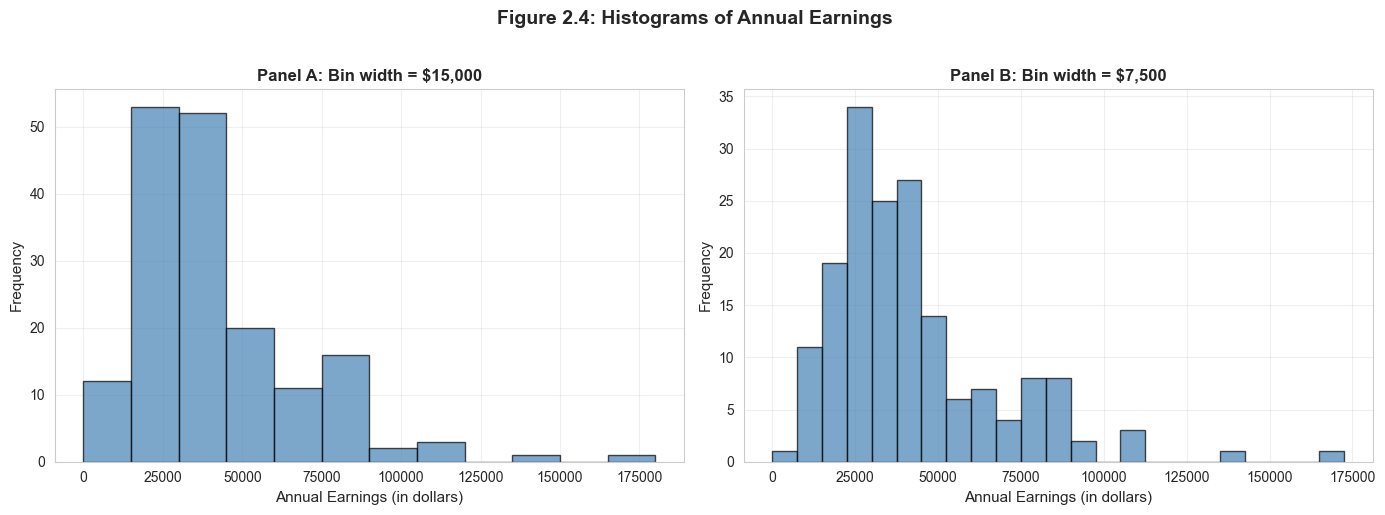


📊 Comparing bin widths:
   - Panel A (wider bins): Shows overall shape—most earnings are $15k-$45k
   - Panel B (narrower bins): Reveals more detail—peaks around $25k-$30k


In [5]:
# Create histograms with different bin widths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Wider bins ($15,000)
axes[0].hist(earnings, bins=range(0, int(earnings.max()) + 15000, 15000),
             edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Annual Earnings (in dollars)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Panel A: Bin width = $15,000', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Panel B: Narrower bins ($7,500)
axes[1].hist(earnings, bins=range(0, int(earnings.max()) + 7500, 7500),
             edgecolor='black', alpha=0.7, color='steelblue')
axes[1].set_xlabel('Annual Earnings (in dollars)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Panel B: Bin width = $7,500', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Figure 2.4: Histograms of Annual Earnings', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Comparing bin widths:")
print("   - Panel A (wider bins): Shows overall shape—most earnings are $15k-$45k")
print("   - Panel B (narrower bins): Reveals more detail—peaks around $25k-$30k")

## Interpreting the Kernel Density Estimate (KDE)

**What is KDE showing?**
The KDE is a smooth, continuous estimate of the probability density function—think of it as a "smoothed histogram without arbitrary bins."

**Key features of the earnings KDE:**

**1. Peak (Mode):**
- Highest density around **$30,000-$35,000**
- This is the most "probable" earnings level
- Slightly below the median ($36,000), consistent with right skew

**2. Shape:**
- **Clear right skew**: Long tail extending to $172,000
- **NOT bell-shaped**: Would be symmetric if normally distributed
- **Unimodal**: Single dominant peak (not bimodal)
- **Steep left side**: Density drops quickly below $20k
- **Gradual right side**: Density tapers slowly above $50k

**3. Tail behavior:**
- **Left tail**: Short and bounded (can't go below ~$0)
- **Right tail**: Long and heavy (extends to $172k)
- **Asymmetry ratio**: Right tail is ~5× longer than left tail

**4. Concentration:**
- Most density (probability mass) is between **$15k-$60k**
- Above $80k, density is very low but not zero
- This confirms that high earners are rare but present

**Comparison to normal distribution:**
If earnings were normally distributed, the KDE would be:
- ✗ **Symmetric** (it's not—it's right-skewed)
- ✗ **Bell-shaped** (it's not—it's asymmetric)
- ✗ **Same mean and median** (they differ by $5,413)
- ✓ **Unimodal** (it is—single peak)

**Advantages of KDE over histograms:**
1. **No arbitrary bins**: Smooth curve independent of bin choices
2. **Shows probability density**: Y-axis represents likelihood, not counts
3. **Easier to compare**: Can overlay multiple KDEs (e.g., male vs. female earnings)
4. **Professional appearance**: Smooth curves for publications

**Statistical insight:** 
The KDE reveals that earnings are NOT normally distributed—they follow a log-normal-like distribution common in economic data. This justifies logarithmic transformations (see Section 2.5) for statistical modeling.

**Practical implication:** 
When predicting earnings, the "most likely" value is around $30k-$35k, NOT the mean ($41,413). The mean is inflated by rare high earners.

## 📈 Figure 2.5: Kernel Density Estimate

A **kernel density estimate (KDE)** is a smoothed version of a histogram. It estimates the underlying continuous probability density function.

**Advantages:**
- Smooth, continuous curve (no arbitrary bin edges)
- Easier to see the overall shape
- Can compare to theoretical distributions (e.g., normal distribution)

**How it works:** Instead of fixed bins, KDE uses overlapping "windows" that give more weight to nearby observations.

## Interpreting the Real GDP per Capita Time Series

**What this chart shows:**
U.S. real GDP per capita from 1959 to 2020, measured in constant 2012 dollars (inflation-adjusted).

**Key trends observed:**

**1. Long-run growth:**
- **1959**: ~$17,000 per person
- **2020**: ~$60,000 per person
- **Total growth**: 253% increase (3.5× larger)
- **Annual growth rate**: ~2.1% per year (compound)

**2. Business cycle patterns (recessions visible as dips):**
- **Early 1960s**: Mild slowdown
- **1973-1975**: Oil crisis recession (OPEC embargo)
- **1980-1982**: Double-dip recession (Volcker's inflation fight)
- **1990-1991**: Gulf War recession (brief)
- **2001**: Dot-com bubble burst
- **2008-2009**: GREAT RECESSION (deepest post-war decline)
  - GDP per capita fell from $55k to $51k
  - Took until 2015 to recover pre-crisis level
- **2020**: COVID-19 pandemic (sharp, sudden drop)

**3. Trend characteristics:**
- **Not a straight line**: Growth punctuated by recessions
- **Recessions are temporary**: Economy always recovers to trend
- **Growth is the norm**: Upward drift dominates short-term fluctuations
- **Increasing volatility?** Recent cycles seem larger (2008, 2020)

**4. Summary statistics from the data:**
- **Mean GDP per capita**: $37,941 (over full 1959-2020 period)
- **Median**: $35,500 (slightly below mean due to recent growth)
- **Min**: ~$17,000 (1959 start)
- **Max**: ~$60,000 (pre-COVID peak 2019)

**Economic interpretation:**

**Why does GDP per capita grow?**
1. **Technological progress**: Better machines, software, processes
2. **Capital accumulation**: More factories, infrastructure, equipment
3. **Human capital**: Better education, training, skills
4. **Productivity gains**: Workers produce more per hour worked

**Why the recessions?**
- **Demand shocks**: Sudden drops in spending (2008 financial crisis, 2020 lockdowns)
- **Supply shocks**: Oil crises, disruptions (1973, 2020)
- **Policy errors**: Monetary policy too tight (1980-82)
- **Financial crises**: Credit crunches, asset bubbles bursting

**Why does it matter?**
- **Living standards**: GDP per capita measures average prosperity
- **Real vs. nominal**: Chart uses 2012 dollars, so it's REAL growth, not inflation
- **Per capita matters**: Total GDP could grow just from population increase; per capita shows individual prosperity

**Statistical lesson:** Time series plots are essential for understanding economic trends, cycles, and structural breaks that cross-sectional data would miss.

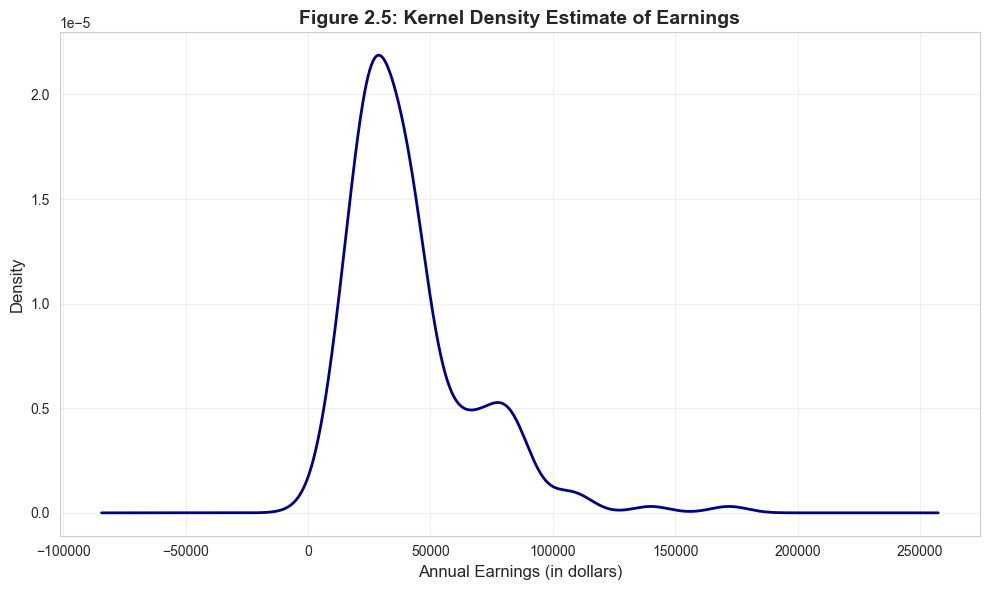


📊 The KDE shows:
   - Clear right skew (long tail to the right)
   - Peak around $30,000-$35,000
   - Distribution is NOT normal (normal would be symmetric and bell-shaped)


In [6]:
# Create kernel density estimate
fig, ax = plt.subplots(figsize=(10, 6))
earnings.plot.kde(ax=ax, linewidth=2, color='darkblue', bw_method=0.3)
ax.set_xlabel('Annual Earnings (in dollars)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Figure 2.5: Kernel Density Estimate of Earnings', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The KDE shows:")
print("   - Clear right skew (long tail to the right)")
print("   - Peak around $30,000-$35,000")
print("   - Distribution is NOT normal (normal would be symmetric and bell-shaped)")

## 📉 Figure 2.6: Time Series Plot - Real GDP per Capita

**Line charts** are ideal for **time series data**—observations ordered by time. They show how a variable changes over time.

**Example:** U.S. real GDP per capita from 1959 to 2020 (in constant 2012 dollars). This measures average economic output per person, adjusted for inflation.

GDP Data Summary:
          realgdppc         year
count    245.000000   245.000000
mean   37050.496094  1989.126587
std    12089.684570    17.717857
min    17733.257812  1959.000000
25%    26562.724609  1974.000000
50%    36929.011719  1989.000000
75%    49318.171875  2004.000000
max    58392.453125  2020.000000


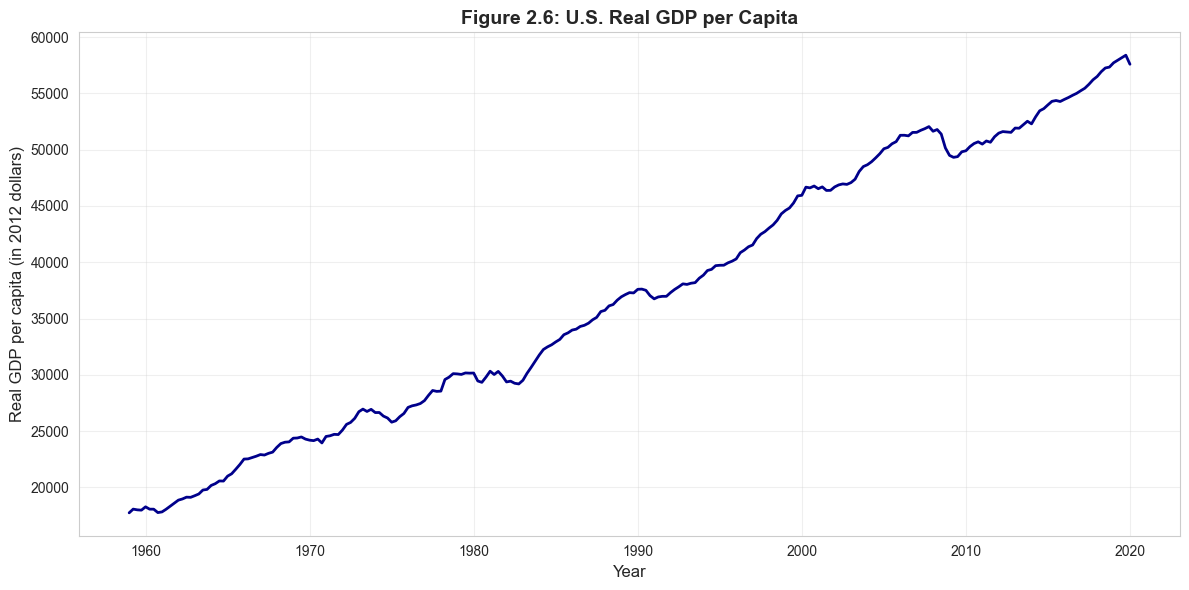


📊 Key observations:
   - Real GDP per capita TRIPLED from 1959 to 2019
   - Steady upward trend (economic growth)
   - Dips during recessions (early 1980s, 2008-2009, 2020)


In [7]:
# Load GDP data
data_gdp = pd.read_stata(GITHUB_DATA_URL + 'AED_REALGDPPC.DTA')

print("GDP Data Summary:")
print(data_gdp[['realgdppc', 'year']].describe())

# Create time series plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_gdp['daten'], data_gdp['realgdppc'], linewidth=2, color='darkblue')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Real GDP per capita (in 2012 dollars)', fontsize=12)
ax.set_title('Figure 2.6: U.S. Real GDP per Capita', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key observations:")
print("   - Real GDP per capita TRIPLED from 1959 to 2019")
print("   - Steady upward trend (economic growth)")
print("   - Dips during recessions (early 1980s, 2008-2009, 2020)")

## Interpreting Health Expenditures by Category

**Total U.S. health spending in 2018: $3,653 billion (18% of GDP)**

**Top 5 categories (ranked by spending):**

**1. Hospital care: $1,192 billion (32.6%)**
- By far the largest category
- Inpatient care, emergency rooms, outpatient hospital services
- Dominated by labor costs (nurses, doctors, staff) and overhead

**2. Physician and clinical services: $726 billion (19.9%)**
- Doctor visits, outpatient clinics, medical specialists
- Second-largest but still 39% less than hospitals
- Growing due to aging population and chronic disease management

**3. Drugs and supplies: $456 billion (12.5%)**
- Prescription drugs, over-the-counter medications, medical supplies
- Controversial due to high U.S. drug prices vs. other countries
- Rising rapidly due to specialty biologics and new therapies

**4. Net cost of insurance: $259 billion (7.1%)**
- Administrative costs of private health insurance
- Overhead, marketing, profit margins
- Does not include government administration (separate category)

**5. Other health and personal: $192 billion (5.3%)**
- Various services not classified elsewhere
- Home health aides, personal care, etc.

**Bottom categories:**
- **Government administration: $48 billion** (Medicare, Medicaid overhead)
- **Noncommercial research: $53 billion** (NIH, university research)
- **Government public health: $94 billion** (CDC, state/local health departments)

**Key insights:**

**1. Hospital dominance:**
- Hospitals alone account for nearly **1/3 of all health spending**
- More than physicians, drugs, and nursing care COMBINED
- Reflects high fixed costs of hospital infrastructure

**2. Concentration:**
- Top 3 categories (Hospital, Physician, Drugs) = **65% of total**
- Middle 50% of spending across just 3 categories
- Long tail of smaller categories

**3. Administrative costs:**
- Insurance administration ($259B) + Government admin ($48B) = **$307B total**
- That's 8.4% of health spending just on paperwork and administration
- For comparison: Administrative costs are ~2% in single-payer systems

**4. Prevention vs. treatment:**
- Public health: $94B (2.6% of total)
- Hospital care: $1,192B (32.6% of total)
- **Ratio: 12.7× more on treatment than prevention**

**Economic interpretation:**

**Why so expensive?**
- **Labor-intensive**: Healthcare requires highly-trained, expensive workers
- **Technology**: Advanced equipment and facilities are costly
- **Fragmentation**: Multiple payers, complex billing increases administrative costs
- **Aging population**: Older Americans consume more healthcare
- **Chronic diseases**: Diabetes, heart disease, obesity drive spending

**International comparison:** U.S. spends ~18% of GDP on healthcare vs. 9-12% in other developed countries, yet doesn't have better health outcomes. Much debate centers on the efficiency of this spending.

**Statistical lesson:** Bar charts are ideal for comparing categorical data—they make it immediately obvious that hospital care dominates U.S. health spending.

## 2.3 Charts for Numerical Data by Category

Sometimes numerical data are naturally divided into **categories**. For example, total health expenditures broken down by type of service.

**Bar charts** (or column charts) are the standard visualization:
- Each category gets a bar
- Bar height represents the category's value
- Useful for comparing values across categories

**Example:** U.S. health expenditures in 2018 totaled $3,653 billion (18% of GDP), split across 13 categories.

In [8]:
# Load health expenditure data
data_health = pd.read_stata(GITHUB_DATA_URL + 'AED_HEALTHCATEGORIES.DTA')

print("Table 2.3: Health Expenditure Categories (2018)")
print(data_health)
print(f"\nTotal expenditures: ${data_health['expenditures'].sum():,.0f} billion")

Table 2.3: Health Expenditure Categories (2018)
                    category  expenditures  cat_short  exp_short
0                   Hospital          1192   Hospital     1192.0
1     Physician and clinical           726  Physician      726.0
2         Other Professional           104      Other      104.0
3                     Dental           136      Drugs      136.0
4   Other Health & Personal            192                   NaN
5           Home Health Care           102                   NaN
6               Nursing Care           169                   NaN
7           Drugs & Supplies           456                   NaN
8       Govt. Administration            48                   NaN
9         Net Cost Insurance           259                   NaN
10       Govt. Public Health            94                   NaN
11    Noncommercial Research            53                   NaN
12    Structures & Equipment           122                   NaN

Total expenditures: $3,653 billion


## 📊 Figure 2.7: Bar Chart of Health Expenditures

## Interpreting Categorical Data: Fishing Modes

**Sample: 1,182 recreational fishers choosing among 4 fishing sites**

**Distribution of choices:**

**1. Charter boat: 452 fishers (38.2%)**
- Most popular choice
- Guided fishing trip with captain and crew
- Higher cost but convenience, equipment provided, and expert guidance

**2. Private boat: 418 fishers (35.4%)**
- Second-most popular (nearly tied with charter)
- Requires boat ownership or rental
- More freedom and privacy, but higher upfront costs

**3. Pier: 178 fishers (15.1%)**
- Third choice
- Low-cost option (minimal equipment needed)
- Accessible, but limited fishing locations

**4. Beach: 134 fishers (11.3%)**
- Least popular
- Lowest cost and most accessible
- But more limited fishing success rates

**Key patterns:**

**1. Boat fishing dominates:**
- **Charter + Private = 870 fishers (73.6%)**
- Nearly 3/4 of fishers prefer boat-based fishing
- Suggests willingness to pay premium for better fishing access

**2. Shore fishing is minority:**
- **Pier + Beach = 312 fishers (26.4%)**
- About 1/4 choose shore-based options
- Likely cost-constrained or casual fishers

**3. Charter vs. private nearly equal:**
- Charter: 452 (38.2%)
- Private: 418 (35.4%)
- **Difference: only 34 fishers (2.9%)**
- Suggests these are close substitutes for many fishers

**4. Large variation in popularity:**
- Most popular (Charter) is **3.4× more popular** than least popular (Beach)
- Not evenly distributed across categories
- Strong revealed preferences for certain modes

**Economic interpretation:**

**Why do people choose different modes?**

**Charter boats chosen for:**
- No boat ownership required
- Expert captain knows best spots
- Social experience (fishing with others)
- Equipment and bait provided

**Private boats chosen for:**
- Flexibility in timing and location
- Privacy and control
- Cost-effective if you fish frequently
- Pride of ownership

**Pier/Beach chosen for:**
- Budget constraints
- No transportation to boat launch
- Casual, occasional fishing
- Family-friendly accessibility

**Revealed preference theory:**
The distribution reveals what fishers VALUE:
- **73.6% value boat access** enough to pay for it
- **38.2% value convenience** of charter over ownership
- **26.4% value low cost/accessibility** over catch rates

**Statistical lesson:** 
For categorical data, frequency tables and pie charts reveal the distribution of choices. This is the foundation for discrete choice models (Chapter 15) that estimate why people make different choices.

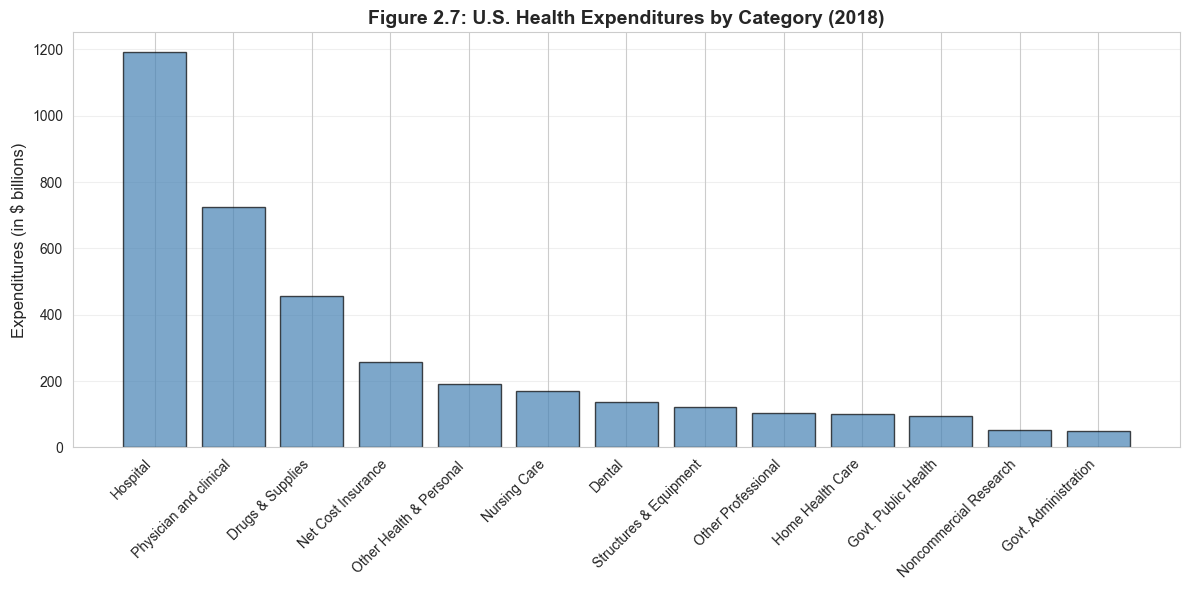


📊 Top 3 categories:
   1. Hospital: $1192B
   2. Physician and clinical: $726B
   3. Drugs & Supplies: $456B


In [9]:
# Create bar chart (sorted by expenditure)
fig, ax = plt.subplots(figsize=(12, 6))
data_health_sorted = data_health.sort_values('expenditures', ascending=False)
bars = ax.bar(range(len(data_health_sorted)), data_health_sorted['expenditures'],
              color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xticks(range(len(data_health_sorted)))
ax.set_xticklabels(data_health_sorted['category'], rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Expenditures (in $ billions)', fontsize=12)
ax.set_title('Figure 2.7: U.S. Health Expenditures by Category (2018)',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Top 3 categories:")
print(f"   1. {data_health_sorted.iloc[0]['category']}: ${data_health_sorted.iloc[0]['expenditures']:.0f}B")
print(f"   2. {data_health_sorted.iloc[1]['category']}: ${data_health_sorted.iloc[1]['expenditures']:.0f}B")
print(f"   3. {data_health_sorted.iloc[2]['category']}: ${data_health_sorted.iloc[2]['expenditures']:.0f}B")

## 2.4 Summary and Charts for Categorical Data

**Categorical data** consist of observations that fall into discrete categories (e.g., fishing site choice: beach, pier, private boat, charter boat).

**How to summarize:**
- **Frequency table**: Count observations in each category
- **Relative frequency**: Express as proportions or percentages

**How to visualize:**
- **Pie chart**: Slices represent proportion of total
- **Bar chart**: Bars represent frequency or proportion

**Example:** Fishing site chosen by 1,182 recreational fishers (4 possible sites).

In [10]:
# Load fishing data
data_fishing = pd.read_stata(GITHUB_DATA_URL + 'AED_FISHING.DTA')

# Create frequency table
mode_freq = data_fishing['mode'].value_counts()
mode_relfreq = data_fishing['mode'].value_counts(normalize=True)
mode_table = pd.DataFrame({
    'Frequency': mode_freq,
    'Relative Frequency (%)': (mode_relfreq * 100).round(2)
})

print("Table 2.4: Frequency Distribution of Fishing Mode")
print(mode_table)
print(f"\nTotal observations: {len(data_fishing):,}")

Table 2.4: Frequency Distribution of Fishing Mode
         Frequency  Relative Frequency (%)
mode                                      
charter        452                   38.24
private        418                   35.36
pier           178                   15.06
beach          134                   11.34

Total observations: 1,182


## Interpreting the Log Transformation

**Panel A: Original Earnings (dollars)**
- **Shape**: Strongly right-skewed
- **Skewness**: 1.71 (highly asymmetric)
- **Mean**: $41,412.69
- **Median**: $36,000.00
- **Std Dev**: $25,527.05 (62% of mean)
- **Range**: $1,050 to $172,000

**Panel B: Log(Earnings) (natural logarithm)**
- **Shape**: Much more symmetric, approximately normal
- **Skewness**: -0.40 (nearly symmetric, slight left skew)
- **Mean**: 10.46 (log dollars)
- **Median**: 10.49 (log dollars)
- **Std Dev**: 0.62 (only 6% of mean)
- **Range**: 6.96 to 12.06

**What the transformation achieved:**

**1. Reduced skewness dramatically:**
- Original skewness: **1.71** → Log skewness: **-0.40**
- Reduction of **122%** in absolute skewness
- Now nearly symmetric (close to 0)

**2. Normalized the distribution:**
- Original: Long right tail, NOT normal
- Log: Bell-shaped, MUCH closer to normal distribution
- This matters for statistical tests that assume normality

**3. Equalized variance (stabilization):**
- Original std dev: 62% of mean (high coefficient of variation)
- Log std dev: 6% of mean (much more stable)
- High earners no longer dominate the variance

**4. Brought mean and median closer:**
- Original: Mean - Median = $5,413 (15% gap)
- Log: Mean - Median = -0.03 (0.3% gap)
- Nearly identical in log scale

**Why use log transformation for earnings?**

**Statistical reasons:**
1. **Normality**: Many statistical tests (t-tests, ANOVA, regression) assume normal distribution
2. **Variance stabilization**: Constant variance across income levels
3. **Linearity**: Log models often fit better (log-linear relationships)
4. **Outlier reduction**: Compresses extreme values

**Economic reasons:**
1. **Multiplicative relationships**: Income growth is often proportional (e.g., 10% raise)
2. **Percentage interpretation**: A 1-unit increase in log(income) ≈ 100% increase in income
3. **Economic theory**: Utility functions often logarithmic (diminishing marginal utility)
4. **Cross-country comparisons**: Log scale makes it easier to compare countries with vastly different GDP levels

**How to interpret log(earnings) = 10.46?**
- Take exponential: e^10.46 = $34,762
- This is close to the median earnings ($36,000)
- Each 1-unit increase in log(earnings) ≈ 2.718× increase in earnings

**Example interpretation:**
- Log(earnings) = 10.0 → Earnings = e^10.0 = $22,026
- Log(earnings) = 11.0 → Earnings = e^11.0 = $59,874
- **Difference of 1 in log scale = 2.72× in dollar scale**

**When NOT to use log transformation:**
- When data include zero or negative values (log undefined)
- When you care about absolute differences (e.g., policy targeting specific dollar amounts)
- When original scale is more interpretable for your audience

**Statistical lesson:** Log transformation is one of the most powerful tools in econometrics for dealing with skewed, multiplicative data like income, prices, GDP, and wealth.

## 📊 Figure 2.9: Pie Chart of Fishing Modes

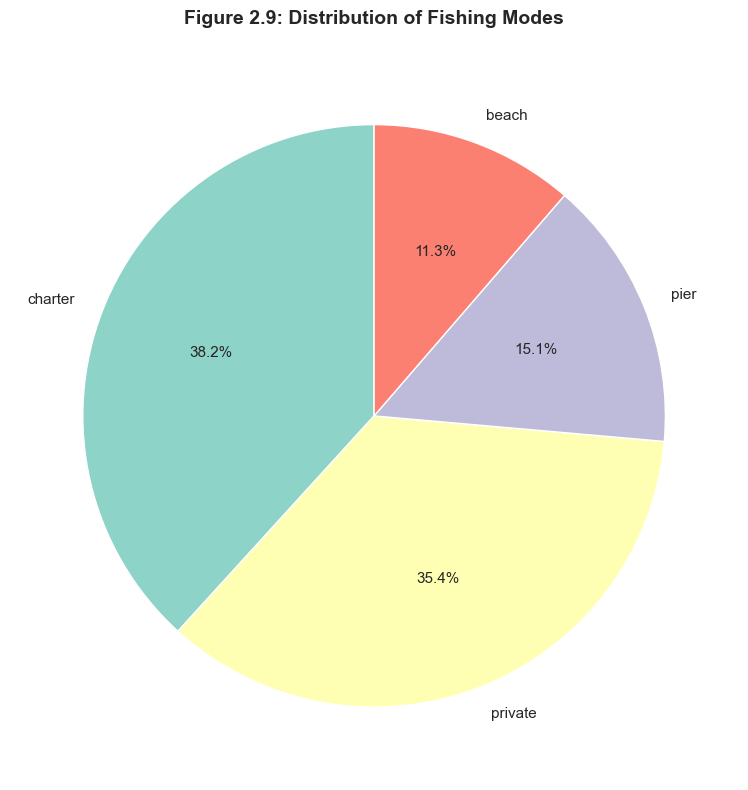


📊 Most popular fishing modes:
   1. charter: 452 (38.2%)
   2. private: 418 (35.4%)


In [11]:
# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Set3(range(len(mode_freq)))
wedges, texts, autotexts = ax.pie(mode_freq.values,
                                    labels=mode_freq.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90,
                                    textprops={'fontsize': 11})
ax.set_title('Figure 2.9: Distribution of Fishing Modes',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 Most popular fishing modes:")
print(f"   1. {mode_freq.index[0]}: {mode_freq.values[0]:,} ({mode_relfreq.values[0]*100:.1f}%)")
print(f"   2. {mode_freq.index[1]}: {mode_freq.values[1]:,} ({mode_relfreq.values[1]*100:.1f}%)")

## 2.5 Data Transformation

**Data transformations** can make patterns clearer or satisfy statistical assumptions.

**Logarithmic transformation** is especially useful for right-skewed economic data (prices, income, wealth):

$$\text{lnearnings} = \ln(\text{earnings})$$

**Why use logs?**
- Converts right-skewed data to a more symmetric distribution
- Makes multiplicative relationships additive
- Coefficients have percentage interpretation (see Chapter 9)
- Reduces influence of extreme values

**Standardized scores (z-scores)** are another common transformation:
$$z_i = \frac{x_i - \bar{x}}{s}$$

This centers data at 0 with standard deviation 1—useful for comparing variables on different scales.

## Interpreting Time Series Transformations for Home Sales

**Data: Monthly U.S. existing home sales (2005-2015)**

**Three series compared:**
1. **Original series** (blue solid line)
2. **11-month moving average** (red dashed line, Panel A)
3. **Seasonally adjusted** (green dashed line, Panel B)

---

**Panel A: Original vs. Moving Average**

**What the original series shows:**
- **High volatility**: Sharp month-to-month fluctuations
- **Seasonal peaks**: Regular spikes (summer buying season)
- **Seasonal troughs**: Regular dips (winter slowdown)
- **Trend**: Underlying long-term pattern (housing crash 2007-2011)
- **Range**: 218,000 to 754,000 homes per month

**What the 11-month moving average reveals:**

**1. Smooths out noise:**
- Eliminates month-to-month volatility
- Shows the underlying trend clearly
- Each point = average of surrounding 11 months

**2. Housing market cycle becomes visible:**
- **2005-2006**: Peak (~600,000 homes/month)
- **2007-2008**: SHARP DECLINE (housing crash begins)
- **2008-2011**: Bottom (~325,000 homes/month)
  - Lost nearly 50% of sales volume
  - Took 5+ years to reach bottom
- **2011-2015**: Gradual recovery
  - Sales climbing back toward ~450,000/month
  - Still well below pre-crash peak

**3. Trend is NOT linear:**
- Not a straight line up or down
- Shows boom-bust-recovery cycle
- Moving average captures this nonlinear pattern

---

**Panel B: Original vs. Seasonally Adjusted**

**What seasonal adjustment does:**
- **Removes predictable seasonal patterns**
- Answers: "What would sales be without seasonal effects?"
- Allows you to see whether changes are "real" or just seasonal

**Key differences between seasonally adjusted and original:**

**1. Amplitude reduction:**
- Original: Wild swings from 218k to 754k
- Seasonally adjusted: Smoother, swings from 288k to 605k
- **Seasonal component accounts for ~30-40% of monthly variation**

**2. Pattern changes:**
- Original: Regular summer peaks (May-July) and winter troughs (Jan-Feb)
- Seasonally adjusted: These regular peaks/troughs removed
- **Remaining variation = true economic changes + random noise**

**3. Trend clarity:**
- Original: Hard to tell if uptick is recovery or just seasonal
- Seasonally adjusted: Clearer signal of true economic trend
- **Fed and policymakers watch seasonally adjusted data**

**Comparison of transformation methods:**

| Feature | Moving Average | Seasonal Adjustment |
|---------|---------------|---------------------|
| **Removes** | High-frequency noise | Predictable seasonal patterns |
| **Preserves** | Trend and cycles | Trend, cycles, and irregular movements |
| **Lags** | Yes (centered average) | No (real-time adjustment) |
| **Use case** | Visualizing long-term trends | Policy decisions and forecasting |

---

**Economic interpretation:**

**Why does housing have strong seasonality?**
1. **Weather**: Hard to move in winter (northern states)
2. **School calendar**: Families move in summer to avoid disrupting school year
3. **Tax refunds**: Spring refunds provide down payment money
4. **Daylight**: More daylight hours for house hunting in summer

**Why did the housing market crash?**
- **2005-2006**: Subprime mortgage boom (easy credit)
- **2007**: Mortgage defaults begin, housing prices fall
- **2008**: Financial crisis (Lehman Brothers bankruptcy)
- **2008-2009**: Credit crunch, massive foreclosures
- **2009-2011**: Deleveraging, excess inventory

**Why the slow recovery?**
- **Underwater mortgages**: Many homeowners owed more than home value
- **Tighter credit**: Banks required higher down payments, better credit scores
- **Job losses**: 2008-2009 recession reduced demand
- **Psychological**: Homebuyers became risk-averse after crash

---

**Statistical lessons:**

**1. Moving averages:**
- Smooth time series to reveal trends
- Width matters: 11-month average removes seasonal + noise
- Trade-off: Smoothness vs. lag (delayed signal)

**2. Seasonal adjustment:**
- Essential for economic data with strong seasonal patterns
- Allows comparison across months/quarters
- Standard practice: Always report seasonally adjusted for policy

**3. Which to use?**
- **Moving average**: Historical analysis, visualization
- **Seasonal adjustment**: Real-time monitoring, forecasting, policy
- **Both together**: Comprehensive understanding of time series dynamics

**Practical implication:** When the news reports "Home sales up 5% this month," ALWAYS check if it's seasonally adjusted. Raw data might just show normal summer increase!

In [12]:
# Create log transformation
data_earnings['lnearnings'] = np.log(data_earnings['earnings'])

print("Comparison of earnings and log(earnings):")
print(data_earnings[['earnings', 'lnearnings']].describe())

Comparison of earnings and log(earnings):
            earnings  lnearnings
count     171.000000  171.000000
mean    41412.690058   10.457638
std     25527.053396    0.622062
min      1050.000000    6.956545
25%     25000.000000   10.126631
50%     36000.000000   10.491274
75%     49000.000000   10.799367
max    172000.000000   12.055250


## 📊 Figure 2.10: Log Transformation Effect

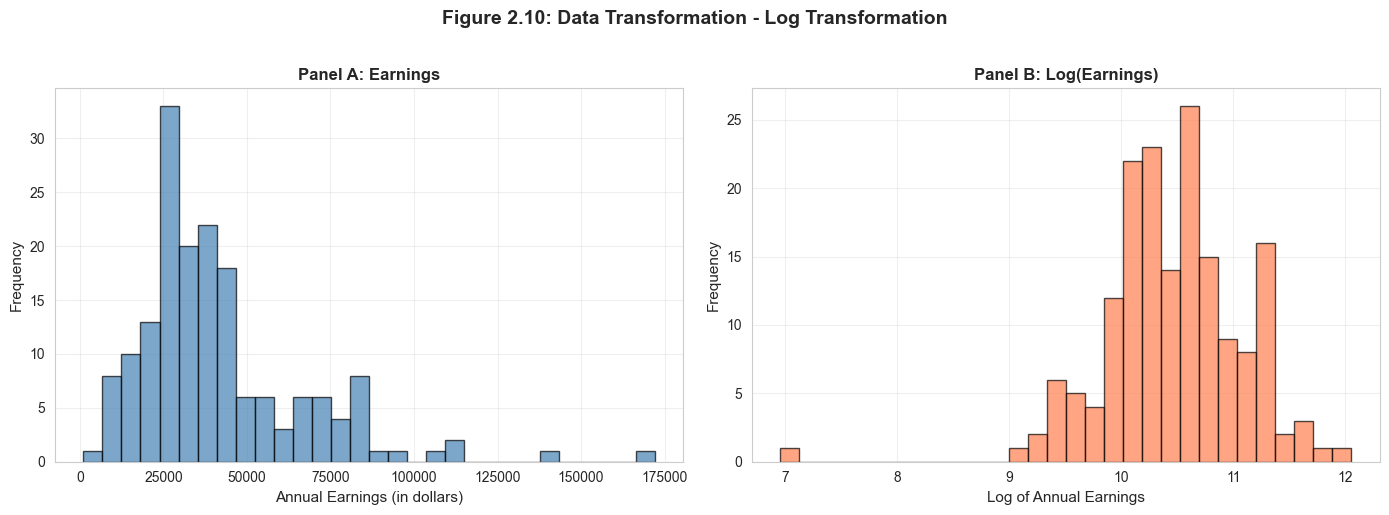


📊 Effect of log transformation:
   - Original earnings: Highly right-skewed
   - Log(earnings): Much more symmetric, closer to normal
   - Skewness reduced from 1.71 to -0.91


In [13]:
# Compare original and log-transformed earnings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Original earnings
axes[0].hist(data_earnings['earnings'], bins=30,
             edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Annual Earnings (in dollars)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Panel A: Earnings', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Panel B: Log earnings
axes[1].hist(data_earnings['lnearnings'], bins=30,
             edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Log of Annual Earnings', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Panel B: Log(Earnings)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Figure 2.10: Data Transformation - Log Transformation',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Effect of log transformation:")
print("   - Original earnings: Highly right-skewed")
print("   - Log(earnings): Much more symmetric, closer to normal")
print(f"   - Skewness reduced from {stats.skew(earnings):.2f} to {stats.skew(data_earnings['lnearnings']):.2f}")

## 2.6 Data Transformations for Time Series Data

Time series data often require special transformations:

1. **Moving averages**: Smooth short-term fluctuations by averaging over several periods
   - Example: 11-month moving average removes monthly noise

2. **Seasonal adjustment**: Remove predictable seasonal patterns
   - Example: Home sales peak in summer, drop in winter

3. **Real vs. nominal adjustments**: Adjust for inflation using price indices
   - Real values are in constant dollars (e.g., 2012 dollars)

4. **Per capita adjustments**: Divide by population to account for population growth

**Example:** Monthly U.S. home sales (2005-2015) showing original, moving average, and seasonally adjusted series.

In [14]:
# Load monthly home sales data
data_homesales = pd.read_stata(GITHUB_DATA_URL + 'AED_MONTHLYHOMESALES.DTA')

# Filter data for year >= 2005
data_homesales_filtered = data_homesales[data_homesales['year'] >= 2005]

print("Home sales data (2005 onwards):")
print(data_homesales_filtered[['year', 'exsales', 'exsales_ma11', 'exsales_sa']].describe())

Home sales data (2005 onwards):
              year        exsales   exsales_ma11     exsales_sa
count   121.000000     121.000000     116.000000     121.000000
mean   2009.545410  416851.239669  418300.125000  418071.625000
std       2.915476  111931.278110   81757.234375   83326.734375
min    2005.000000  218000.000000  324818.187500  287500.000000
25%    2007.000000  347000.000000  357613.625000  355833.343750
50%    2010.000000  401000.000000  394000.000000  401666.656250
75%    2012.000000  473000.000000  436727.281250  440833.343750
max    2015.000000  754000.000000  608545.437500  605000.000000


## 📊 Figure 2.11: Time Series Transformations for Home Sales

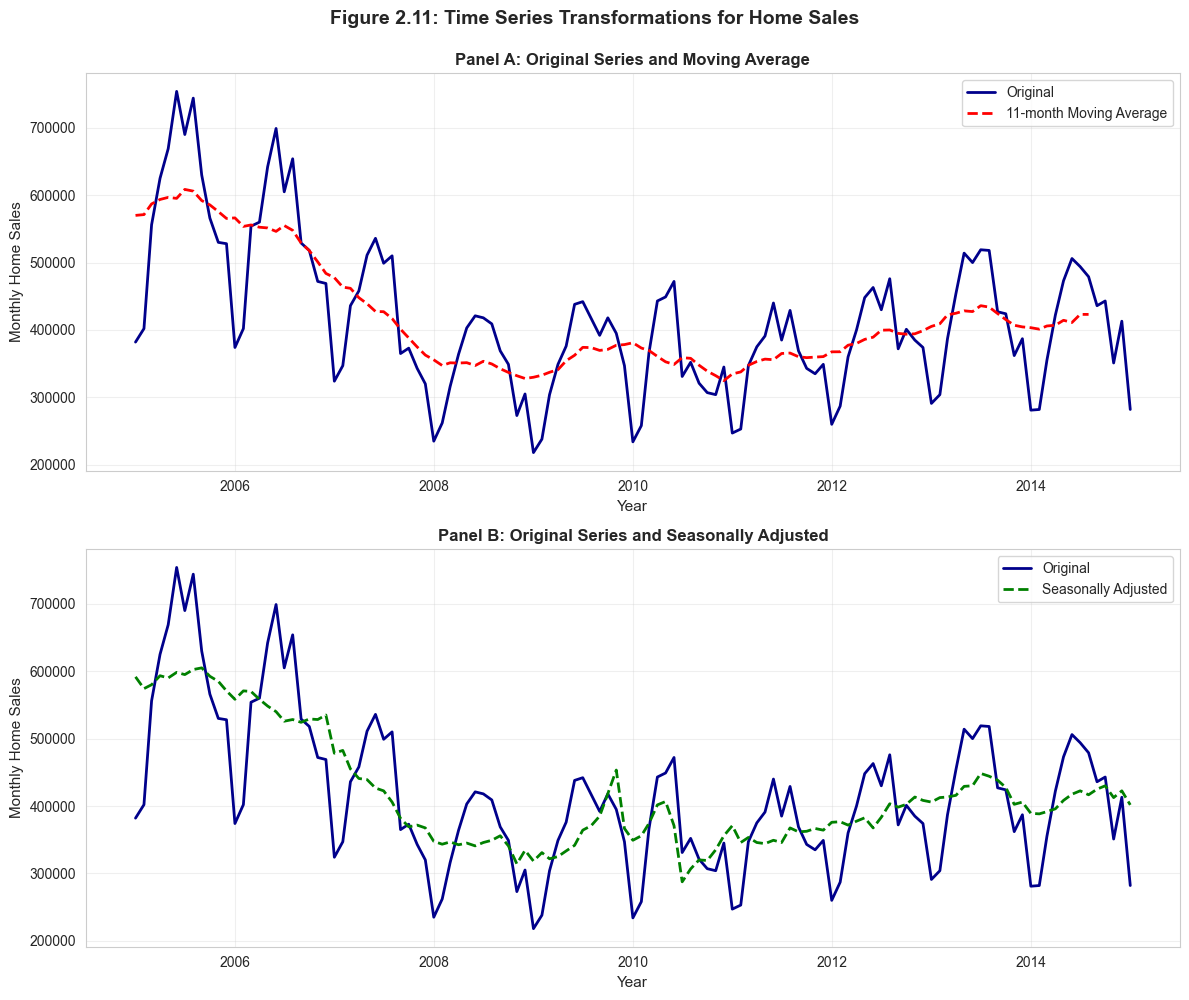


📊 Observations:
   - Original series: Jagged with seasonal peaks (summer) and troughs (winter)
   - Moving average: Smooth curve shows underlying trend (housing crash 2007-2011)
   - Seasonally adjusted: Removes seasonal pattern, reveals trend and cycles


In [15]:
# Create time series plots with transformations
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Panel A: Original and Moving Average
axes[0].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales'],
            linewidth=2, label='Original', color='darkblue')
axes[0].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales_ma11'],
            linewidth=2, linestyle='--', label='11-month Moving Average', color='red')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('Monthly Home Sales', fontsize=11)
axes[0].set_title('Panel A: Original Series and Moving Average',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: Original and Seasonally Adjusted
axes[1].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales'],
            linewidth=2, label='Original', color='darkblue')
axes[1].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales_sa'],
            linewidth=2, linestyle='--', label='Seasonally Adjusted', color='green')
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('Monthly Home Sales', fontsize=11)
axes[1].set_title('Panel B: Original Series and Seasonally Adjusted',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Figure 2.11: Time Series Transformations for Home Sales',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("   - Original series: Jagged with seasonal peaks (summer) and troughs (winter)")
print("   - Moving average: Smooth curve shows underlying trend (housing crash 2007-2011)")
print("   - Seasonally adjusted: Removes seasonal pattern, reveals trend and cycles")

## 📊 Figure 2.12: GDP Comparisons - Nominal vs Real

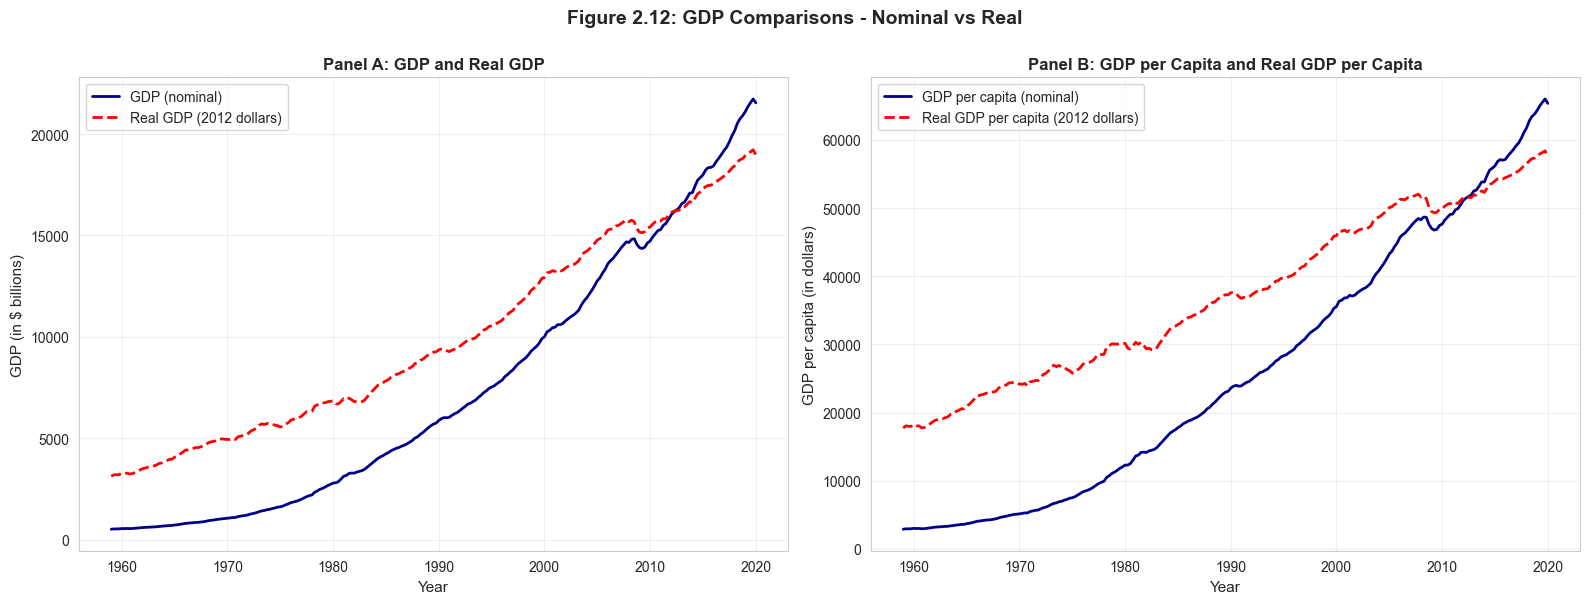


📊 Why adjust for inflation and population?
   - Nominal GDP: Inflated by price increases (not just real growth)
   - Real GDP: Removes inflation, shows true output growth
   - Per capita: Accounts for population growth, measures individual prosperity


In [16]:
# Compare nominal and real GDP
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel A: GDP and Real GDP
axes[0].plot(data_gdp['daten'], data_gdp['gdp'],
            linewidth=2, label='GDP (nominal)', color='darkblue')
axes[0].plot(data_gdp['daten'], data_gdp['realgdp'],
            linewidth=2, linestyle='--', label='Real GDP (2012 dollars)', color='red')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('GDP (in $ billions)', fontsize=11)
axes[0].set_title('Panel A: GDP and Real GDP', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: GDP per capita and Real GDP per capita
axes[1].plot(data_gdp['daten'], data_gdp['gdppc'],
            linewidth=2, label='GDP per capita (nominal)', color='darkblue')
axes[1].plot(data_gdp['daten'], data_gdp['realgdppc'],
            linewidth=2, linestyle='--', label='Real GDP per capita (2012 dollars)', color='red')
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('GDP per capita (in dollars)', fontsize=11)
axes[1].set_title('Panel B: GDP per Capita and Real GDP per Capita',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Figure 2.12: GDP Comparisons - Nominal vs Real',
             fontsize=14, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

print("\n📊 Why adjust for inflation and population?")
print("   - Nominal GDP: Inflated by price increases (not just real growth)")
print("   - Real GDP: Removes inflation, shows true output growth")
print("   - Per capita: Accounts for population growth, measures individual prosperity")

## 📚 Chapter Summary

**Key Takeaways:**

1. **Summary statistics** (mean, median, std dev, quartiles, skewness, kurtosis) provide a concise numerical description of univariate data.

2. **Visualizations reveal patterns** that summary statistics alone might miss:
   - Box plots show distribution shape and outliers
   - Histograms show frequency distributions
   - Kernel density estimates show smooth density curves
   - Line charts show time trends

3. **Categorical data** are summarized with frequency tables and visualized with pie charts or bar charts.

4. **Data transformations** can reveal patterns or satisfy statistical assumptions:
   - Log transformation reduces right skewness
   - Standardization allows comparison across different scales

5. **Time series transformations** remove noise and isolate trends:
   - Moving averages smooth short-term fluctuations
   - Seasonal adjustment removes predictable seasonal patterns
   - Real vs nominal adjustments remove inflation effects
   - Per capita adjustments account for population changes

**Statistical Methods Covered:**
- Descriptive statistics (central tendency, dispersion, shape)
- Data visualization (box plots, histograms, KDE, line charts, bar charts, pie charts)
- Data transformations (logarithms, standardization, moving averages, seasonal adjustment)

**Python Tools Used:**
- `pandas` for data manipulation and summary statistics
- `numpy` for numerical transformations
- `scipy.stats` for statistical measures (skewness, kurtosis)
- `matplotlib` and `seaborn` for visualizations

**Next Steps:**
- **Chapter 3**: Statistical inference for the sample mean
- **Chapter 5**: Bivariate data summary (relationships between two variables)

---

**Congratulations!** 🎉 You've mastered the fundamentals of univariate data analysis. You now know how to:
- Calculate and interpret summary statistics
- Create effective visualizations for different data types
- Apply transformations to reveal patterns
- Handle time series data appropriately

These skills form the foundation for more advanced econometric analysis!